In [5]:
import os
from PIL import Image
from path import Path
from fastai.data.all import *
from fastai.vision.all import *


In [6]:
from enum import Enum

class Emotion(Enum):
    ANGRY = 'angry'
    DISGUSTED = 'disgusted'
    FEARFUL = 'fearful'
    HAPPY = 'happy'
    NEUTRAL = 'neutral'
    SAD = 'sad'
    SURPRISED = 'surprised'

In [7]:
print(Emotion.DISGUSTED.value)

disgusted


In [8]:
path = Path('data')
test_path = path/'test'
train_path = path/'train'

In [9]:
#Print Image Label Distributions
for label in list(Emotion):
    label = label.value
    print(label, '\nTrain: ' + str(len(os.listdir(train_path/label)))+ ' images' +'\nTest: ' + str(len(os.listdir(test_path/label)))+' images\n')

angry 
Train: 3995 images
Test: 958 images

disgusted 
Train: 436 images
Test: 111 images

fearful 
Train: 4097 images
Test: 1024 images

happy 
Train: 7215 images
Test: 1774 images

neutral 
Train: 4965 images
Test: 1233 images

sad 
Train: 4830 images
Test: 1247 images

surprised 
Train: 3171 images
Test: 831 images



In [10]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=2),
                  )
dls = dblock.dataloaders(train_path, bs=32)

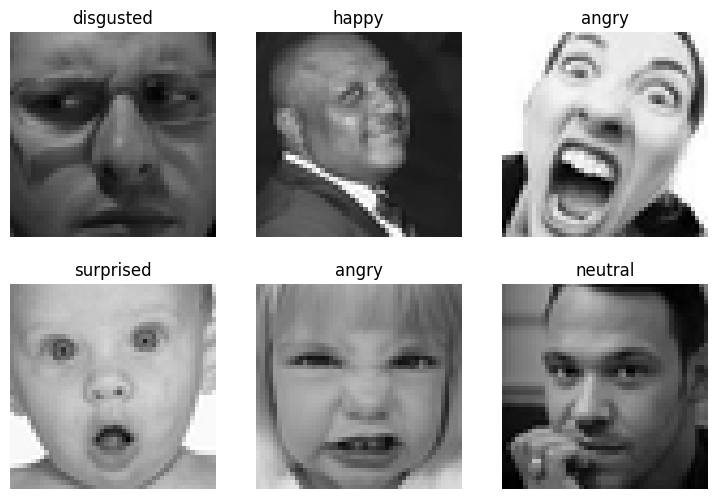

In [11]:
dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, 'convnext_tiny_hnf', metrics=error_rate)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,1.647944,1.440821,0.541369,09:46


epoch,train_loss,valid_loss,error_rate,time
0,1.308662,1.197429,0.451489,12:59
1,1.167013,1.128934,0.421181,12:21
2,1.111517,1.085841,0.405156,1:03:11
3,1.000731,1.053541,0.389479,16:03
4,0.866703,1.058075,0.381815,15:48
5,0.712682,1.137289,0.384776,15:41
6,0.533604,1.279613,0.374673,16:19
7,0.413555,1.464954,0.380770,17:06
8,0.283347,1.693599,0.378157,21:40
9,0.195908,1.881965,0.382163,19:38


SuggestedLRs(valley=2.75422871709452e-06)

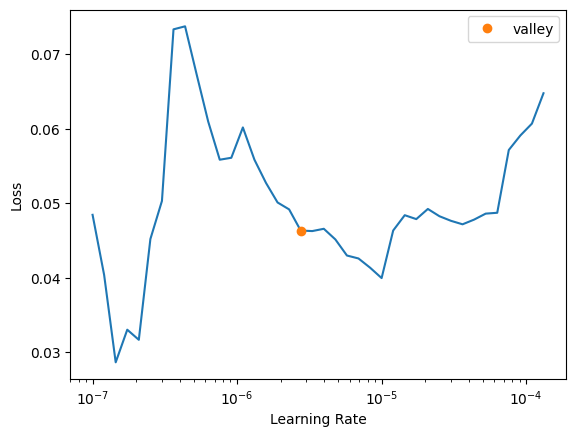

In [13]:
#plot the learning rate finder
learn.lr_find()

In [14]:
# choose the learning rate at the steepest descending part of the plot
lr_choice = 4.786300905834651e-06

In [15]:
learn.fine_tune(3, base_lr=lr_choice)

epoch,train_loss,valid_loss,error_rate,time
0,0.046133,2.356352,0.379376,14:00
1,0.045269,2.347583,0.377983,15:49
2,0.042289,2.373030,0.379202,14:43


In [16]:
interpret = ClassificationInterpretation.from_learner(learn)

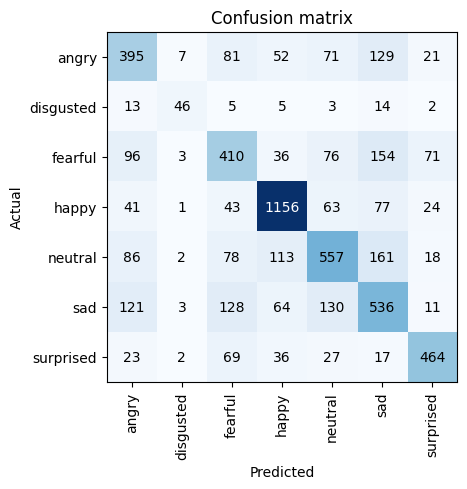

In [17]:
interpret.plot_confusion_matrix()

In [19]:
correct_preds, total = 0, 0
for emotion in [emotion.value for emotion in Emotion]:
    for img_path in get_image_files(test_path/emotion)[:30]:        
        prediction = learn.predict(img_path)[0]
        actual = parent_label(img_path)
        if prediction == actual:
            correct_preds += 1
        total += 1


210